In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Explore the dataset
print("Features: ", diabetes.feature_names)
print("Shape of data: ", X.shape)
print("Shape of target: ", y.shape)

# For a better understanding, let's put it in a pandas DataFrame
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Matplotlib is building the font cache; this may take a moment.


Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Shape of data:  (442, 10)
Shape of target:  (442,)

First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Missing values in each column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s


--- Simple Linear Regression ---
MAE: 52.26
MSE: 4061.83
RMSE: 63.73
R²: 0.23


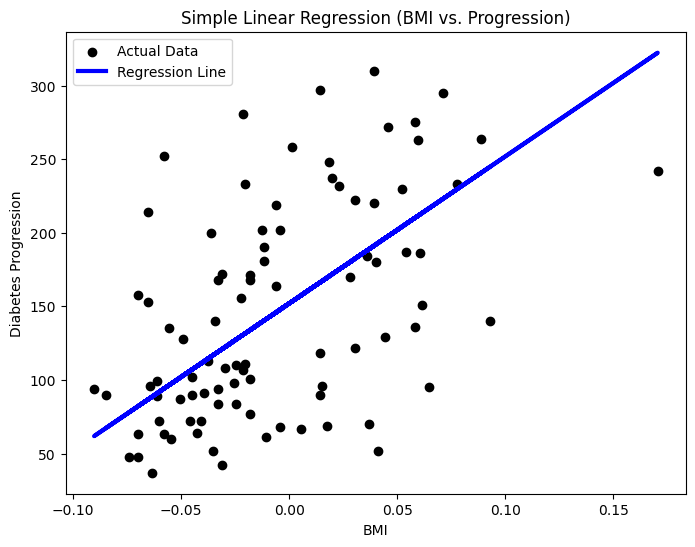

In [2]:
# Use only the 'bmi' feature (index 2)
X_bmi = X[:, np.newaxis, 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Train the simple linear regression model
slr = LinearRegression()
slr.fit(X_train, y_train)

# Make predictions
y_pred_slr = slr.predict(X_test)

# Evaluate the model
print("\n--- Simple Linear Regression ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_slr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_slr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_slr)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_slr):.2f}")

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred_slr, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Simple Linear Regression (BMI vs. Progression)')
plt.legend()
plt.show()


--- Multiple Linear Regression ---
MAE: 42.79
MSE: 2900.19
RMSE: 53.85
R²: 0.45


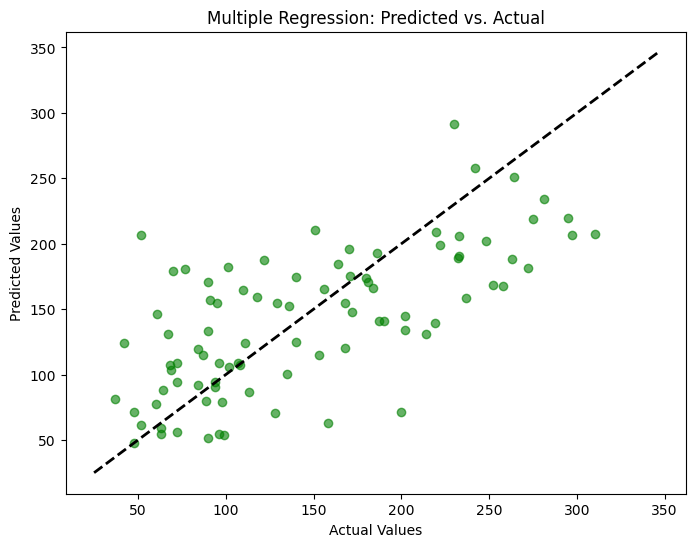

In [3]:
# Use all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Make predictions
y_pred_mlr = mlr.predict(X_test)

# Evaluate the model
print("\n--- Multiple Linear Regression ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_mlr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_mlr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_mlr)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_mlr):.2f}")

# Visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlr, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Regression: Predicted vs. Actual')
plt.show()


--- Polynomial Regression (Degree 2) ---
MAE: 43.58
MSE: 3096.03
RMSE: 55.64
R²: 0.42


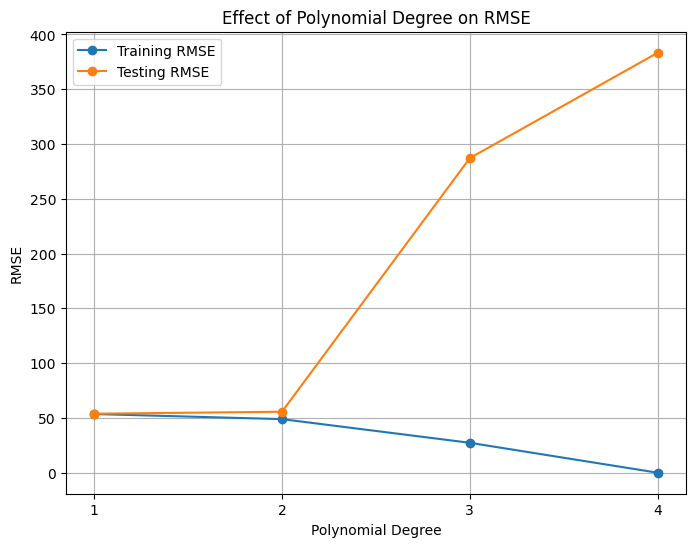

In [4]:
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = poly_reg.predict(X_poly_test)

# Evaluate the model
print("\n--- Polynomial Regression (Degree 2) ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_poly):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_poly):.2f}")

# Demonstrate the effect of polynomial degree
degrees = [1, 2, 3, 4]
train_rmse = []
test_rmse = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train_loop = poly.fit_transform(X_train)
    X_poly_test_loop = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train_loop, y_train)
    
    y_train_pred = model.predict(X_poly_train_loop)
    y_test_pred = model.predict(X_poly_test_loop)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_rmse, 'o-', label='Training RMSE')
plt.plot(degrees, test_rmse, 'o-', label='Testing RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Effect of Polynomial Degree on RMSE')
plt.legend()
plt.xticks(degrees)
plt.grid(True)
plt.show()


--- Ridge Regression (alpha=1.0) ---
MAE: 46.14
MSE: 3077.42
RMSE: 55.47
R²: 0.42

--- Lasso Regression (alpha=0.1) ---
MAE: 42.85
MSE: 2798.19
RMSE: 52.90
R²: 0.47


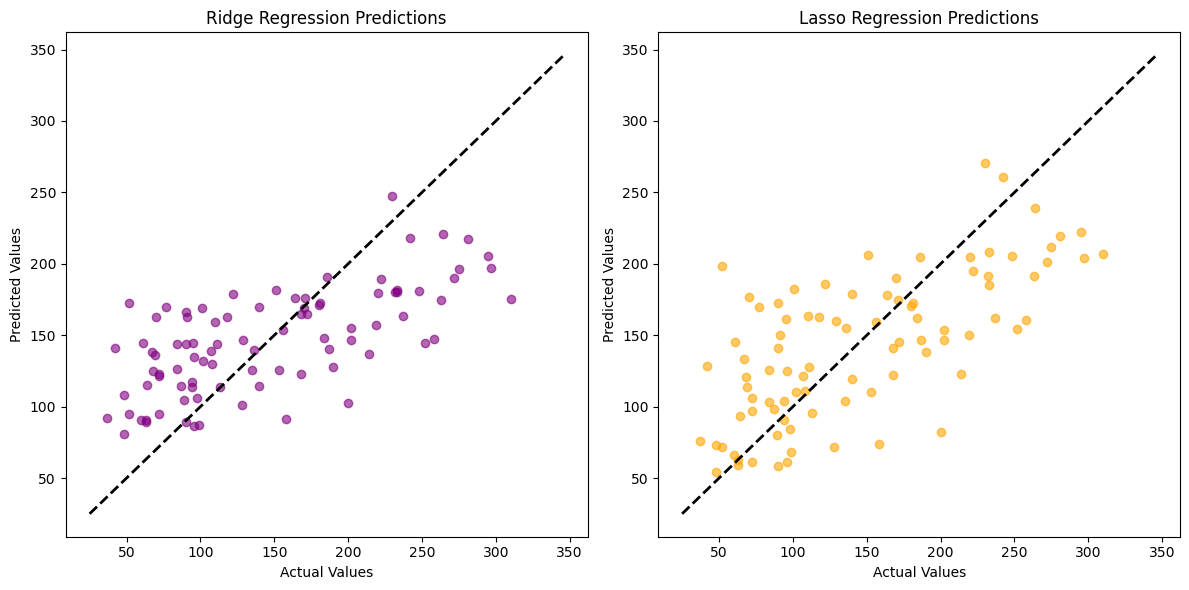

In [5]:
# Implement Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\n--- Ridge Regression (alpha=1.0) ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_ridge):.2f}")

# Implement Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\n--- Lasso Regression (alpha=0.1) ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lasso):.2f}")

# Visualize Ridge and Lasso Predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Predictions')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Predictions')

plt.tight_layout()
plt.show()